# Importing packages

In [1]:
from brightway2 import *
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python
import matplotlib as mpl
import matplotlib.pyplot as plt
import bw2calc as bc
import seaborn as sns
import textwrap
%matplotlib inline

# Set project

In [2]:
projects.set_current('Nukos_Meta_LCA')

In [3]:
del databases['Nukos_BG']
del databases['Nukos_FG_pess']
del databases['Nukos_FG_real']
del databases['Nukos_FG_opt']

In [4]:
databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.7.1 cutoff

# Import biosphere3 and ecoinvent

In [5]:
# Import the biosphere3 database
bw2setup()  # This will take some time

Biosphere database already present!!! No setup is needed


In [6]:
# Import ecoinvent

# You need to change the line below with the directory where you have saved ecoinvent
ei371dir = "/Users/niltho/OneDrive - Danmarks Tekniske Universitet/Dokumenter/BW2/ecoinvent/ecoinvent 3.7.1_cutoff_ecoSpold02/datasets"

if 'ecoinvent 3.7.1 cutoff' in databases:
    print("Database has already been imported")
else:
    ei371 = SingleOutputEcospold2Importer(ei371dir, 'ecoinvent 3.7.1 cutoff') # You can give it another name of course
    ei371.apply_strategies()
    ei371.statistics()
    ei371.write_database() # This will take some time.

Database has already been imported


In [7]:
databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.7.1 cutoff

## Search in ecoinvent

In [8]:
eidb = Database('ecoinvent 3.7.1 cutoff')

In [9]:
for activity in eidb.search(('diesel')):
    print(activity)
    print(activity['code'])

'market for diesel' (kilogram, ZA, None)
45bd36db4e79f811be719a4753c49756
'diesel, burned in diesel-electric generating set, 18.5kW' (megajoule, GLO, None)
b60e585e14f776d51051364bc196788c
'market for diesel' (kilogram, IN, None)
df87b0b60c456e71b2f5fa3075fdc25a
'market for diesel' (kilogram, Europe without Switzerland, None)
ae89728e6a0201cc91f1645c0878a957
'market for diesel' (kilogram, PE, None)
d84fba1d70f2ea0c9e7d465cb0912739
'market for diesel' (kilogram, CH, None)
0d54608e4d6dbf288899f283cb7fe64a
'market for diesel' (kilogram, CO, None)
0d69cd25606893f8acbebddc3ef06aec
'market for diesel' (kilogram, RoW, None)
4b4acccb8ba5c9dcbc9295b56738b10a
'market for diesel' (kilogram, BR, None)
55389b18a41cbe73b27b581083126b0d
'diesel, burned in diesel-electric generating set, 10MW' (megajoule, GLO, None)
330b846b691151b8b2c9eaca66f80a7f
'market group for diesel' (kilogram, RER, None)
8d61c7bc694bb4854d149999445b5dbc
'market group for diesel' (kilogram, GLO, None)
b778261fbd822ecee227a28e6d

In [10]:
for activity in eidb.search(('diesel'), filter={"location" : 'DE'}):
    print(activity)
    print(activity['code'])

Excluding 556 filtered results
'water pump operation, diesel' (megajoule, DE, None)
99fe24e4b2bc4a52f40d226cff1543ec
'transport, freight train' (ton kilometer, DE, None)
03256ea43b955b9aec71b5db1191e094
'electricity production, nuclear, pressure water reactor' (kilowatt hour, DE, None)
5c4c000afd0b0019c8af5e1601332b0a
'deep well drilling, for deep geothermal power' (meter, DE, None)
46c270ccb921b638d989b46f924d1cf4
'recultivation, bentonite mine' (square meter, DE, None)
b16fc85d3c222207c68c469b352b1b8a
'bentonite quarry operation' (kilogram, DE, None)
c9c85d522f718424ed37b6b31cd15b79
'electricity production, nuclear, boiling water reactor' (kilowatt hour, DE, None)
77ad0f467d1462a0c0beb131095a0f17
'electricity production, hydro, run-of-river' (kilowatt hour, DE, None)
460986a677faacd597a4368f055cf745


In [11]:
my_act = eidb.get('d838a6e69ca239cedc767bd9f1cfdf28')
my_act._data

{'comment': 'Documentation for this model can be found in the ecoinvent refinery report by Fehrenbach et al. (2018).\nThis dataset describes the operation of a typical oil refinery in the given geography. Since refineries are very complex the actual unit process modeling is done in a separate refinery model by ifeu and this is a subdivided product-specific dataset.\nDespite the default settings (weighted EU average), the refinery model was adjusted to fit typical refinery production data in the special geographies. In order to do this data from the refineries in the countries was analysed and an assessment of the refinery complexity (according to the BREF classes) was done. Furthermore crude oil qualities were researched an adjusted (e.g. sulphur content and API class) to fit the specified geography.\nThe ifeu refinery model reproduces the complexity of petroleum refinery plants in which the combination and sequence of processes are usually very specific to the characteristics of the r

In [12]:
my_act.exchanges()

In [13]:
for i in list(my_act.exchanges()):  # Epxlore the activity as usual
    print(i['type'])
    print(i)
    print(i['input'])
    print('-------')

technosphere
Exchange: 1.69029247587972e-06 kilogram 'market for cobalt' (kilogram, GLO, None) to 'diesel production, petroleum refinery operation' (kilogram, BR, None)>
('ecoinvent 3.7.1 cutoff', '5eed4222cfe657b540620c211355b7ba')
-------
technosphere
Exchange: -0.000164965162293721 kilogram 'market for hazardous waste, for underground deposit' (kilogram, RoW, None) to 'diesel production, petroleum refinery operation' (kilogram, BR, None)>
('ecoinvent 3.7.1 cutoff', 'b4148b63e6cedc669628bd19cd1e44a3')
-------
technosphere
Exchange: -0.000300052662338999 kilogram 'market for hazardous waste, for incineration' (kilogram, RoW, None) to 'diesel production, petroleum refinery operation' (kilogram, BR, None)>
('ecoinvent 3.7.1 cutoff', '3ab48514375cf3c3037d0be56e247a10')
-------
technosphere
Exchange: -0.000573317870636341 kilogram 'market for refinery sludge' (kilogram, RoW, None) to 'diesel production, petroleum refinery operation' (kilogram, BR, None)>
('ecoinvent 3.7.1 cutoff', '8bbdd2

## Search in biosphere

In [14]:
biodb = Database('biosphere3')

In [15]:
for activity in biodb.search('carbon dioxide, fossil'): 
    print(activity)
    #print(activity['categories'])
    print(activity['code'])

'Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term'))
e259263c-d1f1-449f-bb9b-73c6d0a32a00
'Carbon dioxide, fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere'))
16eeda8a-1ea2-408e-ab37-2648495058dd
'Carbon dioxide, fossil' (kilogram, None, ('air',))
349b29d1-3e58-4c66-98b9-9d1a076efd2e
'Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks'))
aa7cac3a-3625-41d4-bc54-33e2cf11ec46
'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))
f9749677-9c9f-4678-ab55-c607dfdc2cb9
'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere'))
4e1f0bb0-2703-4303-bf86-972d810612cf
'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground'))
73ed05cc-9727-4abf-9516-4b5c0fe54a16
'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks'))
d6235194-e4e6-4548-bfa3-ac095131aef4
'Carbon dioxide, non-fossil' (

In [16]:
my_exc = biodb.get('1f3c2297-d652-468d-82e8-4fd59bf5b5b8')
my_exc._data

{'categories': ('soil', 'forestry'),
 'code': '1f3c2297-d652-468d-82e8-4fd59bf5b5b8',
 'CAS number': '007439-98-7',
 'name': 'Molybdenum',
 'database': 'biosphere3',
 'unit': 'kilogram',
 'type': 'emission'}

## Massimo's import routine

In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 31 15:21:32 2017

@author: massimo
"""


import pandas as pd
import numpy as np

def lci_to_bw2(mydb):
    '''A function to convert a pd.Dataframe to a dict
    to be used as database in bw2'''
    
    act_keys_raw = list(mydb.columns[0:5])
    act_keys_bw2 = [i.replace('Activity ','') for i in act_keys_raw]
    
    exc_keys_raw = list(mydb.columns[5:])
    exc_keys_bw2 = [i.replace('Exchange ','') for i in exc_keys_raw]
    
    def exc_to_dict(df_data, some_list):
        exc_data = (pd.DataFrame(list(df_data.values), index = list(exc_keys_bw2))).T
        exc_data = exc_data.dropna(axis=1, how='any') # remove columns withouth the data
        e_values = (exc_data.values).tolist()[0]
        e_values = [(e_values[0],e_values[1])] + e_values[2:]
        some_list.append(dict(zip(list(exc_data.columns)[1:], e_values)))
        
    def act_to_dict(act_data):
        a_keys = act_keys_bw2[2:] + ['exchanges']
        return dict(zip(a_keys, act_data))
    
    def bio_to_dict(bio_data):
        b_keys = act_keys_bw2[2:]
        return dict(zip(b_keys, bio_data))
        
    
    db_keys = []
    db_values =[]
    
    for act in mydb['Activity name'].unique():
    
        sel = mydb[mydb['Activity name'] == act]
        db_key = (list(sel['Activity database'])[0], list(sel['Activity code'])[0])
        db_keys.append(db_key)
        
        if list(sel['Activity type'].unique())[0] == 'biosphere':
                    
            my_bio_data = list(sel.iloc[0,2:5].values)
            db_value = bio_to_dict(my_bio_data)
            db_values.append(db_value)
        
        else:
            my_exc = []
            for i in range(sel.shape[0]):
                exc_to_dict(sel.iloc[i,5:],my_exc)
            
            my_act_data = list(sel.iloc[0,2:5].values) + [my_exc]
            db_value = act_to_dict(my_act_data)
            db_values.append(db_value)
        
     
    bw2_db = dict(zip(db_keys, db_values))
    
    return bw2_db # We have a dict to be used as database. Perfect.

# Import

In [18]:
bgdb = pd.read_excel('LCI.xlsx', sheet_name='Background_db', header = 0)
# clean up a bit
bgdb = bgdb.drop('Notes', 1)  # remove the columns not needed
bgdb['Exchange uncertainty type'] = bgdb['Exchange uncertainty type'].fillna(0).astype(int) # uncertainty as integer 
                    ### Note: (can't have the full column if there are mixed nan and values, so use zero as default)
# Create a dict that can be written as database
bw2_db = lci_to_bw2(bgdb) # Perfect.
bg_db = Database('Nukos_BG') # it works because the database name in the excel file is the same
    # shut down all other notebooks using the same project
bg_db.write(bw2_db)

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\3178325105.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bgdb = bgdb.drop('Notes', 1)  # remove the columns not needed
Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 07/10/2023 14:35:06
  Finished: 07/10/2023 14:35:06
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 0.32


In [19]:
fgdb_pess = pd.read_excel('LCI.xlsx', sheet_name='Foreground_db_pessimistic', header = 0)
# clean up a bit
fgdb_pess = fgdb_pess.drop('Notes', 1)  # remove the columns not needed
fgdb_pess['Exchange uncertainty type'] = fgdb_pess['Exchange uncertainty type'].fillna(0).astype(int) # uncertainty as integer 
                    ### Note: (can't have the full column if there are mixed nan and values, so use zero as default)
# Create a dict that can be written as database
bw2_db = lci_to_bw2(fgdb_pess) # Perfect.
fg_db_pess = Database('Nukos_FG_pess') # it works because the database name in the excel file is the same
    # shut down all other notebooks using the same project
fg_db_pess.write(bw2_db)

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\2680739965.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fgdb_pess = fgdb_pess.drop('Notes', 1)  # remove the columns not needed
Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 07/10/2023 14:35:07
  Finished: 07/10/2023 14:35:07
  Total time elapsed: 00:00:00
  CPU %: 49.60
  Memory %: 0.32


In [20]:
fgdb_real = pd.read_excel('LCI.xlsx', sheet_name='Foreground_db_realistic', header = 0)
# clean up a bit
fgdb_real = fgdb_real.drop('Notes', 1)  # remove the columns not needed
fgdb_real['Exchange uncertainty type'] = fgdb_real['Exchange uncertainty type'].fillna(0).astype(int) # uncertainty as integer 
                    ### Note: (can't have the full column if there are mixed nan and values, so use zero as default)
# Create a dict that can be written as database
bw2_db = lci_to_bw2(fgdb_real) # Perfect.
fg_db_real = Database('Nukos_FG_real') # it works because the database name in the excel file is the same
    # shut down all other notebooks using the same project
fg_db_real.write(bw2_db)

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\419115102.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fgdb_real = fgdb_real.drop('Notes', 1)  # remove the columns not needed
Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 07/10/2023 14:35:08
  Finished: 07/10/2023 14:35:08
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 0.32


In [21]:
fgdb_opt = pd.read_excel('LCI.xlsx', sheet_name='Foreground_db_optimistic', header = 0)
# clean up a bit
fgdb_opt = fgdb_opt.drop('Notes', 1)  # remove the columns not needed
fgdb_opt['Exchange uncertainty type'] = fgdb_opt['Exchange uncertainty type'].fillna(0).astype(int) # uncertainty as integer 
                    ### Note: (can't have the full column if there are mixed nan and values, so use zero as default)
# Create a dict that can be written as database
bw2_db = lci_to_bw2(fgdb_opt) # Perfect.
fg_db_opt = Database('Nukos_FG_opt') # it works because the database name in the excel file is the same
    # shut down all other notebooks using the same project
fg_db_opt.write(bw2_db)

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4028333739.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fgdb_opt = fgdb_opt.drop('Notes', 1)  # remove the columns not needed
Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 07/10/2023 14:35:09
  Finished: 07/10/2023 14:35:09
  Total time elapsed: 00:00:00
  CPU %: 33.20
  Memory %: 0.32


In [22]:
acts_Nukos = [act['name'] for act in fg_db_pess]
acts_Nukos.sort()

In [23]:
 ('IPCC 2013', 'climate change', 'GWP 100a'),


GWI = [m for m in methods if
       'IPCC 2013' in m[0]
       and 'no LT' not in str(m)
       and 'GWP 100a' in m[2]]
GWI.sort()

In [24]:
GWI

[('IPCC 2013', 'climate change', 'GWP 100a')]

In [25]:
mymethod = GWI[0]
mymethod

('IPCC 2013', 'climate change', 'GWP 100a')

In [26]:
test = fg_db_pess.get('Carbonation mixing 1')

E = [test]
fu = {E[0]: 1}
lca = LCA(fu, mymethod)
lca.lci()
lca.lcia()
print(fu, lca.score)

{'Carbonation mixing 1' (kilogram, None, None): 1} -34.017652262196385


In [27]:
test = bg_db.get('CEM I')

E = [test]
fu = {E[0]: 1}
lca = LCA(fu, mymethod)
lca.lci()
lca.lcia()
print(fu, lca.score)

{'CEM I' (kilogram, None, None): 1} 0.8768053302435995


In [28]:
test = eidb.get('f46be3f9ceda9863f49b7a7ed20b127e')

E = [test]
fu = {E[0]: -2.074688797}
lca = LCA(fu, mymethod)
lca.lci()
lca.lcia()
print(fu, lca.score)

{'market for concrete, 25-30MPa' (cubic meter, RoW, None): -2.074688797} -672.3725579749251


In [29]:
def dolcacalc(myact, mydemand, mymethod):
    my_fu = {myact: mydemand} 
    lca = LCA(my_fu, mymethod)
    lca.lci()
    lca.lcia()
    return lca.score

def getLCAresults(acts, database, mymethod):
    
    all_activities = []
    results = []
    for a in acts:
        act = Database(database).get(a)
        all_activities.append(act['name'])
        results.append(dolcacalc(act,1,mymethod)) # 1 stays for one unit of each process
     
    results_dict = dict(zip(all_activities, results))
    
    return results_dict

In [30]:
databases

Databases dictionary with 6 object(s):
	Nukos_BG
	Nukos_FG_opt
	Nukos_FG_pess
	Nukos_FG_real
	biosphere3
	ecoinvent 3.7.1 cutoff

In [31]:
results_GWI = []
for m in GWI:
    results_all_acts = getLCAresults(acts_Nukos, "Nukos_FG_pess", m) # total impact per tech
    results_GWI.append(results_all_acts)
    
midpoint_methods_names = []
for m in GWI:
    midpoint_methods_names.append(m)
    
LCIA_Nukos_FG_pess = pd.DataFrame(results_GWI, index=GWI)
LCIA_Nukos_FG_pess.head()

,Carbonation curing 1,Carbonation curing 2,Carbonation curing 3,Carbonation mixing 1,Direct aqueous carbonation 1,Direct aqueous carbonation 10,Direct aqueous carbonation 11,Direct aqueous carbonation 12,Direct aqueous carbonation 13,Direct aqueous carbonation 14,...,Indirect aqueous carbonation 5,Indirect aqueous carbonation 6,Indirect aqueous carbonation 7,Indirect aqueous carbonation 8,Indirect aqueous carbonation 9,Indirect solid carbonation 1,Indirect solid carbonation 2,Indirect solid carbonation 3,Indirect solid carbonation 4,Indirect solid carbonation 5
"(IPCC 2013, climate change, GWP 100a)",-1.885717,-0.443343,-2.03429,-34.017652,-0.351816,-0.937259,-0.932794,-0.942528,-0.937825,-0.948566,...,-2.051563,-2.160594,0.492093,1.153557,1.41723,-1.305346,-0.386,0.197847,-0.408274,2.360862


In [32]:
results_GWI = []
for m in GWI:
    results_all_acts = getLCAresults(acts_Nukos, "Nukos_FG_real", m) # total impact per tech
    results_GWI.append(results_all_acts)
    
midpoint_methods_names = []
for m in GWI:
    midpoint_methods_names.append(m)
    
LCIA_Nukos_FG_real = pd.DataFrame(results_GWI, index=GWI)
LCIA_Nukos_FG_real.head()

,Carbonation curing 1,Carbonation curing 2,Carbonation curing 3,Carbonation mixing 1,Direct aqueous carbonation 1,Direct aqueous carbonation 10,Direct aqueous carbonation 11,Direct aqueous carbonation 12,Direct aqueous carbonation 13,Direct aqueous carbonation 14,...,Indirect aqueous carbonation 5,Indirect aqueous carbonation 6,Indirect aqueous carbonation 7,Indirect aqueous carbonation 8,Indirect aqueous carbonation 9,Indirect solid carbonation 1,Indirect solid carbonation 2,Indirect solid carbonation 3,Indirect solid carbonation 4,Indirect solid carbonation 5
"(IPCC 2013, climate change, GWP 100a)",-1.885717,-0.443343,-2.03429,-34.017652,-0.351816,-2.548215,-2.736444,-2.403441,-2.635178,-2.307367,...,-2.051563,-2.160594,-0.403923,-0.852862,-0.159136,-1.313637,-0.39429,-1.114738,-0.408274,2.360862


In [33]:
results_GWI = []
for m in GWI:
    results_all_acts = getLCAresults(acts_Nukos, "Nukos_FG_opt", m) # total impact per tech
    results_GWI.append(results_all_acts)
    
midpoint_methods_names = []
for m in GWI:
    midpoint_methods_names.append(m)
    
LCIA_Nukos_FG_opt = pd.DataFrame(results_GWI, index=GWI)
LCIA_Nukos_FG_opt.head()

,Carbonation curing 1,Carbonation curing 2,Carbonation curing 3,Carbonation mixing 1,Direct aqueous carbonation 1,Direct aqueous carbonation 10,Direct aqueous carbonation 11,Direct aqueous carbonation 12,Direct aqueous carbonation 13,Direct aqueous carbonation 14,...,Indirect aqueous carbonation 5,Indirect aqueous carbonation 6,Indirect aqueous carbonation 7,Indirect aqueous carbonation 8,Indirect aqueous carbonation 9,Indirect solid carbonation 1,Indirect solid carbonation 2,Indirect solid carbonation 3,Indirect solid carbonation 4,Indirect solid carbonation 5
"(IPCC 2013, climate change, GWP 100a)",-1.885717,-0.443343,-2.03429,-34.017652,-6.165869,-3.389737,-3.678624,-3.166584,-3.521832,-3.01717,...,-2.051563,-2.160594,-5.286415,-2.152357,-2.444168,-5.432013,-4.512667,-5.311697,-4.631016,-2.012246


In [34]:
acts_diluted = []
acts_pure = []

for act in acts_Nukos:
    tech = fg_db_opt.get(act)
    for exc in tech.exchanges():
        if exc['input'][1] == 'Diluted CO2':
            acts_diluted.append(act)
        elif exc['input'][1] == 'Pure CO2':
            acts_pure.append(act)

In [35]:
LCIA_Nukos_pess = LCIA_Nukos_FG_pess.transpose()
LCIA_Nukos_pess = LCIA_Nukos_pess.unstack().reset_index()
LCIA_Nukos_pess['CO2 source'] = np.where(LCIA_Nukos_pess['level_1'].isin(acts_diluted), 'Diluted CO2', 'Pure CO2')
LCIA_Nukos_pess['level_1'] = LCIA_Nukos_pess.level_1.str[:-2]
LCIA_Nukos_pess['Scenario'] = 'Pessimistic'
LCIA_Nukos_real = LCIA_Nukos_FG_real.transpose()
LCIA_Nukos_real = LCIA_Nukos_real.unstack().reset_index()
LCIA_Nukos_real['CO2 source'] = np.where(LCIA_Nukos_real['level_1'].isin(acts_diluted), 'Diluted CO2', 'Pure CO2')
LCIA_Nukos_real['level_1'] = LCIA_Nukos_real.level_1.str[:-2]
LCIA_Nukos_real['Scenario'] = 'Realistic'
LCIA_Nukos_opt = LCIA_Nukos_FG_opt.transpose()
LCIA_Nukos_opt = LCIA_Nukos_opt.unstack().reset_index()
LCIA_Nukos_opt['CO2 source'] = np.where(LCIA_Nukos_opt['level_1'].isin(acts_diluted), 'Diluted CO2', 'Pure CO2')
LCIA_Nukos_opt['level_1'] = LCIA_Nukos_opt.level_1.str[:-2]
LCIA_Nukos_opt['Scenario'] = 'Optimistic'
frames = [LCIA_Nukos_pess, LCIA_Nukos_real, LCIA_Nukos_opt]
LCIA_Nukos = pd.concat(frames, ignore_index=True)
LCIA_Nukos = LCIA_Nukos.rename(columns={"level_0": "Impact Category", "level_1": "Route", 0: 'Impact'})
LCIA_Nukos['Route'] = LCIA_Nukos['Route'].apply(lambda x: str(x).rstrip())
LCIA_Nukos

,Impact Category,Route,Impact,CO2 source,Scenario
0,"(IPCC 2013, climate change, GWP 100a)",Carbonation curing,-1.885717,Pure CO2,Pessimistic
1,"(IPCC 2013, climate change, GWP 100a)",Carbonation curing,-0.443343,Pure CO2,Pessimistic
2,"(IPCC 2013, climate change, GWP 100a)",Carbonation curing,-2.034290,Pure CO2,Pessimistic
3,"(IPCC 2013, climate change, GWP 100a)",Carbonation mixing,-34.017652,Pure CO2,Pessimistic
4,"(IPCC 2013, climate change, GWP 100a)",Direct aqueous carbonation,-0.351816,Pure CO2,Pessimistic
...,...,...,...,...,...
121,"(IPCC 2013, climate change, GWP 100a)",Indirect solid carbonation,-5.432013,Pure CO2,Optimistic
122,"(IPCC 2013, climate change, GWP 100a)",Indirect solid carbonation,-4.512667,Pure CO2,Optimistic
123,"(IPCC 2013, climate change, GWP 100a)",Indirect solid carbonation,-5.311697,Pure CO2,Optimistic
124,"(IPCC 2013, climate change, GWP 100a)",Indirect solid carbonation,-4.631016,Diluted CO2,Optimistic


In [36]:
LCIA_Nukos_grouped = LCIA_Nukos.groupby(['Impact Category', 'Route', 'Scenario']).agg({'Impact': ['median']})
name = 'LCIA_median.xlsx'
writer = pd.ExcelWriter(name, engine='xlsxwriter')
LCIA_Nukos_grouped.to_excel(writer, sheet_name = 'Median')
writer.save()

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\1094850637.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [37]:
method = GWI[0]
method

('IPCC 2013', 'climate change', 'GWP 100a')

In [38]:
LCIA_Nukos["Route"].unique()

array(['Carbonation curing', 'Carbonation mixing',
       'Direct aqueous carbonation', 'Electrochemical conversion',
       'Indirect aqueous carbonation', 'Indirect solid carbonation'],
      dtype=object)

In [86]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

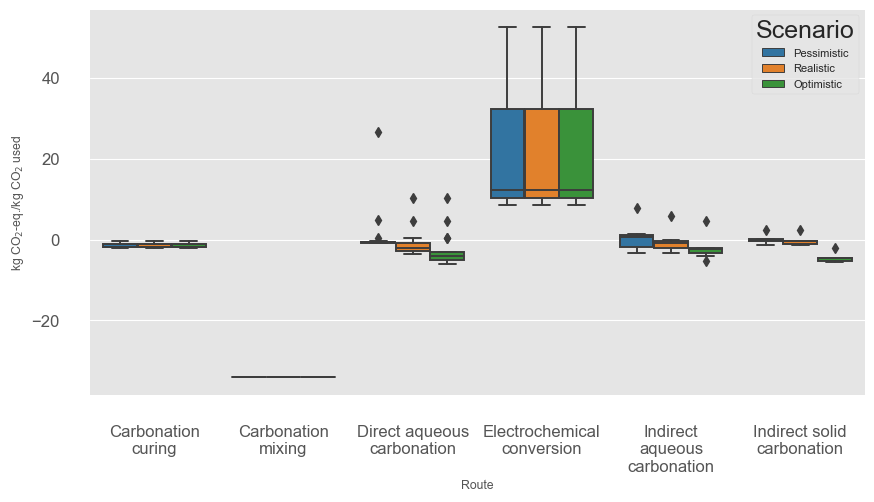

In [87]:
method = GWI[0]

#LCIA_Nukos_reduced = LCIA_Nukos.loc[LCIA_Nukos['Impact Category'] ==
#                                ('GWI 2.0 2018 midpoint', 'climate change', 'climate change total')]
LCIA_Nukos_reduced = LCIA_Nukos[(LCIA_Nukos['Route'] == 'Direct aqueous carbonation') |
                                (LCIA_Nukos['Route'] == 'Indirect aqueous carbonation') | 
                                (LCIA_Nukos['Route'] == 'Indirect solid carbonation') |
                                (LCIA_Nukos['Route'] == 'Carbonation curing') |
                                (LCIA_Nukos['Route'] == 'Carbonation mixing') |
                                (LCIA_Nukos['Route'] == 'Electrochemical conversion')]
plt.figure(figsize=(10,5))

max_width = 15
ax = sns.boxplot(x="Route", y="Impact",
            hue="Scenario",
            data=LCIA_Nukos_reduced, palette='tab10')
ax.set(ylabel=r'kg CO$_2$-eq./kg CO$_2$ used')
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
sns.despine(offset=10, trim=True)

plt.savefig("Boxplot/Boxplot_GWI_for_publication.tiff", dpi = 300, bbox_inches='tight')

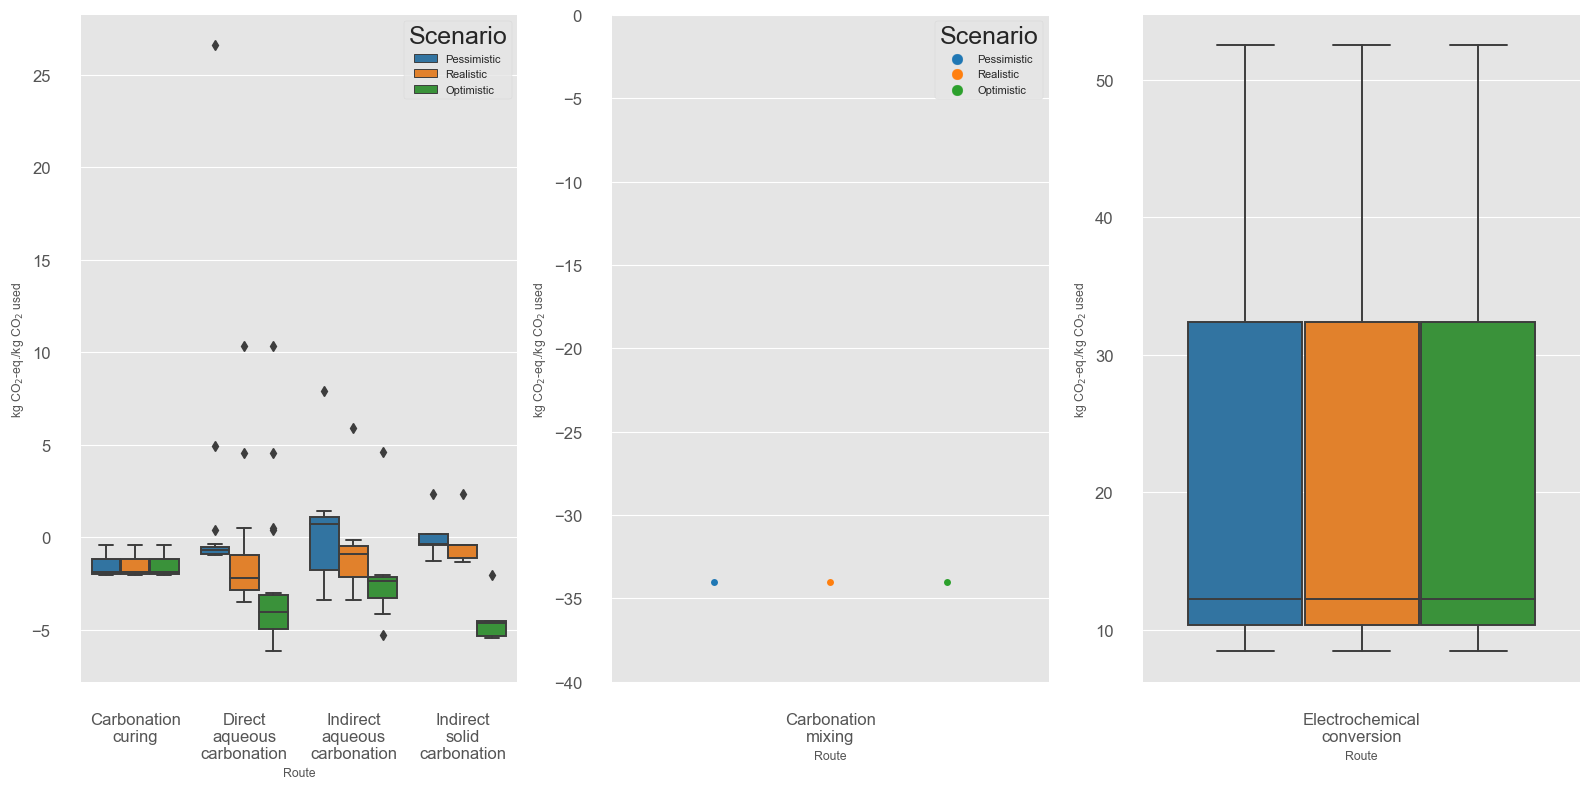

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

LCIA_Nukos_reduced = LCIA_Nukos[(LCIA_Nukos['Route'] == 'Direct aqueous carbonation') |
                                (LCIA_Nukos['Route'] == 'Indirect aqueous carbonation') |
                                (LCIA_Nukos['Route'] == 'Indirect solid carbonation') |
                                (LCIA_Nukos['Route'] == 'Carbonation curing') |
                                (LCIA_Nukos['Route'] == 'Carbonation mixing') |
                                (LCIA_Nukos['Route'] == 'Electrochemical conversion')]

fig, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=False)

max_width = 13

# Plot 1: All routes except Carbonation curing
sns.boxplot(x="Route", y="Impact", hue="Scenario", palette='tab10', data=LCIA_Nukos_reduced[(LCIA_Nukos_reduced['Route'] != 'Carbonation mixing') & (LCIA_Nukos_reduced['Route'] != 'Electrochemical conversion')], ax=axes[0])
axes[0].set(ylabel=r'kg CO$_2$-eq./kg CO$_2$ used')
axes[0].set_xticklabels([textwrap.fill(x.get_text(), max_width) for x in axes[0].get_xticklabels()])

# Plot 2: Carbonation curing
sns.swarmplot(x="Route", y="Impact", hue="Scenario", dodge=True, palette='tab10', data=LCIA_Nukos_reduced[LCIA_Nukos_reduced['Route'] == 'Carbonation mixing'], ax=axes[1])
axes[1].set(ylabel=r'kg CO$_2$-eq./kg CO$_2$ used')
axes[1].set_ylim(-40,0)
#axes[1].legend().set_visible(False)
axes[1].set_xticklabels([textwrap.fill(x.get_text(), max_width) for x in axes[1].get_xticklabels()])

# Plot 3: Electrochemical conversion
sns.boxplot(x="Route", y="Impact", hue="Scenario", palette='tab10', data=LCIA_Nukos_reduced[LCIA_Nukos_reduced['Route'] == 'Electrochemical conversion'], ax=axes[2])
axes[2].set(ylabel=r'kg CO$_2$-eq./kg CO$_2$ used')
axes[2].legend().set_visible(False)
axes[2].set_xticklabels([textwrap.fill(x.get_text(), 15) for x in axes[2].get_xticklabels()])

sns.despine(offset=10, trim=True)
plt.tight_layout()

plt.savefig("Boxplot/Boxplot_GWI_for_publication.tiff", dpi=300, bbox_inches='tight')

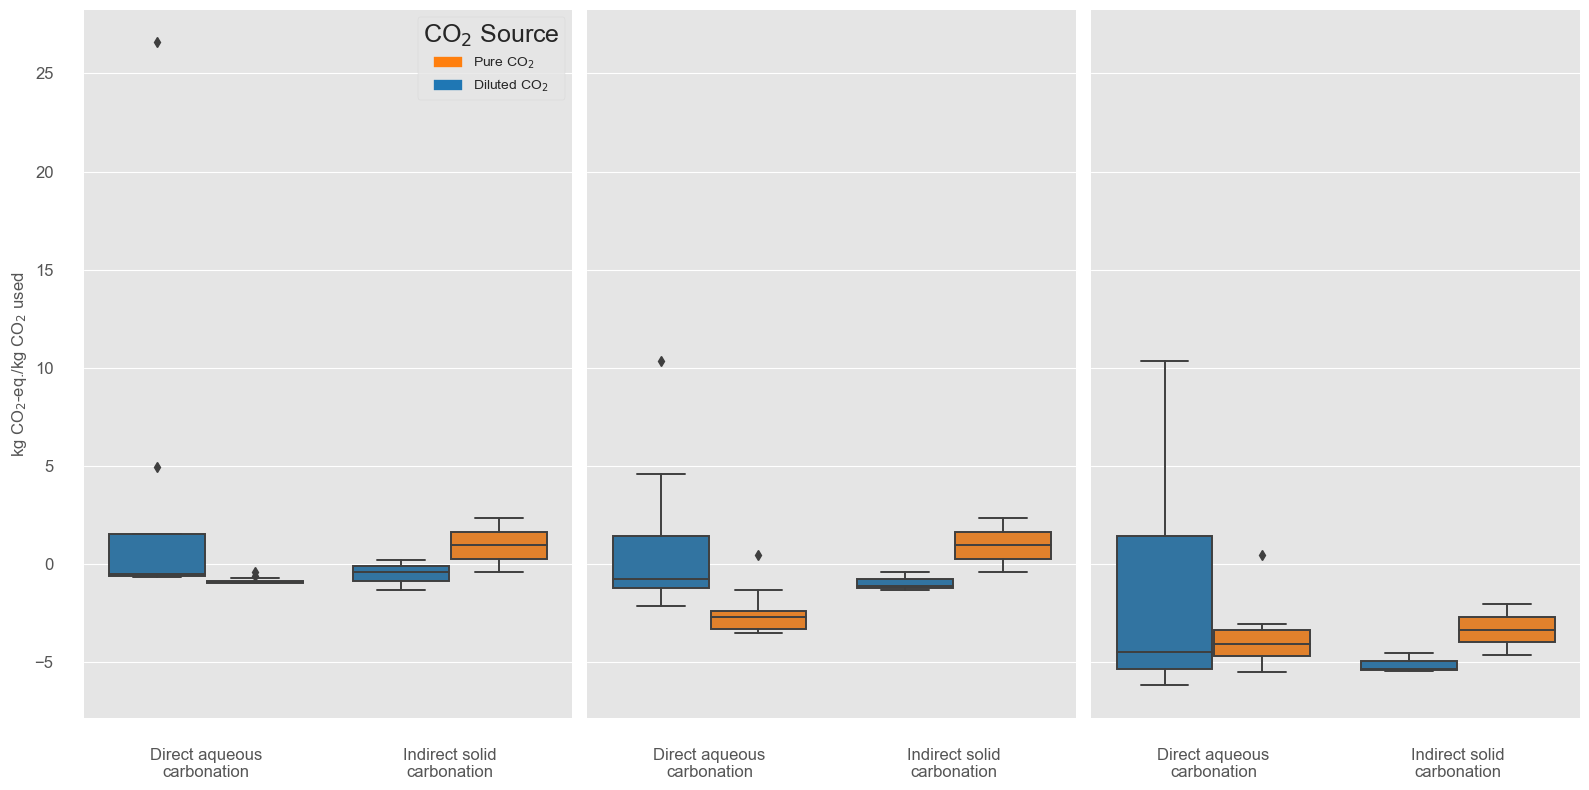

In [89]:
import matplotlib.patches as mpatches

LCIA_Nukos_reduced = LCIA_Nukos[(LCIA_Nukos['Route'] == 'Direct aqueous carbonation') |
                                (LCIA_Nukos['Route'] == 'Indirect solid carbonation')]

fig, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

max_width = 15
handles = [
    mpatches.Patch(color=sns.color_palette('tab10')[1], label='Pure CO$_2$'),
    mpatches.Patch(color=sns.color_palette('tab10')[0], label='Diluted CO$_2$')
]

# Plot 1: All routes except Carbonation curing
sns.boxplot(x="Route", y="Impact", hue="CO2 source", palette='tab10', data=LCIA_Nukos_reduced[LCIA_Nukos_reduced['Scenario'] == 'Pessimistic'], ax=axes[0])
axes[0].set(xlabel='')
axes[0].set_ylabel(ylabel=r'kg CO$_2$-eq./kg CO$_2$ used', fontsize=12)
axes[0].legend(title=r"CO$_2$ Source", fontsize='medium', handles=handles)
axes[0].set_xticklabels([textwrap.fill(x.get_text(), max_width) for x in axes[0].get_xticklabels()])


# Plot 2: Carbonation curing
sns.boxplot(x="Route", y="Impact", hue="CO2 source", palette='tab10', data=LCIA_Nukos_reduced[LCIA_Nukos_reduced['Scenario'] == 'Realistic'], ax=axes[1])
axes[1].set(xlabel='', ylabel='')
axes[1].legend().set_visible(False)
axes[1].set_xticklabels([textwrap.fill(x.get_text(), max_width) for x in axes[1].get_xticklabels()])

# Plot 3: Electrochemical conversion
sns.boxplot(x="Route", y="Impact", hue="CO2 source", palette='tab10', data=LCIA_Nukos_reduced[LCIA_Nukos_reduced['Scenario'] == 'Optimistic'], ax=axes[2])
axes[2].set(xlabel='', ylabel='')
axes[2].legend().set_visible(False)
axes[2].set_xticklabels([textwrap.fill(x.get_text(), 15) for x in axes[2].get_xticklabels()])

sns.despine(offset=10, trim=True)
plt.tight_layout()

plt.savefig("Boxplot/Boxplot_CO2_source.tiff", dpi=300, bbox_inches='tight')

In [90]:
for m in GWI: 
    LCIA_Nukos_reduced = LCIA_Nukos.loc[LCIA_Nukos['Impact Category'] == m]
    LCIA_Nukos_reduced = LCIA_Nukos_reduced[(LCIA_Nukos_reduced['Route'] == 'Direct aqueous carbonation') |
                                            (LCIA_Nukos_reduced['Route'] == 'Indirect aqueous carbonation') | 
                                            (LCIA_Nukos_reduced['Route'] == 'Indirect solid carbonation') |
                                            (LCIA_Nukos_reduced['Route'] == 'Carbonation curing')]
    IC_name = m[2].capitalize().replace(' ', '_')
    plt.style.use('ggplot')
    max_width = 15
    ax = sns.boxplot(x="Route", y="Impact",
                hue="Scenario",
                data=LCIA_Nukos_reduced)
    ax.set(ylabel=m[2].capitalize() + ' [' + methods[m]['unit'] + ']')
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    sns.despine(offset=10, trim=True)
    plt.savefig("Boxplot/Boxplot_" + IC_name + "_grouped.png", dpi = 300, bbox_inches='tight')
    plt.clf()

<Figure size 640x440 with 0 Axes>

In [46]:
name = 'LCIA.xlsx'
writer = pd.ExcelWriter(name, engine='xlsxwriter')
LCIA_Nukos_FG_pess.to_excel(writer, sheet_name = 'Nukos_FG_pess')
LCIA_Nukos_FG_real.to_excel(writer, sheet_name = 'Nukos_FG_real')
LCIA_Nukos_FG_opt.to_excel(writer, sheet_name = 'Nukos_FG_opt')
writer.save()

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\1973071080.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


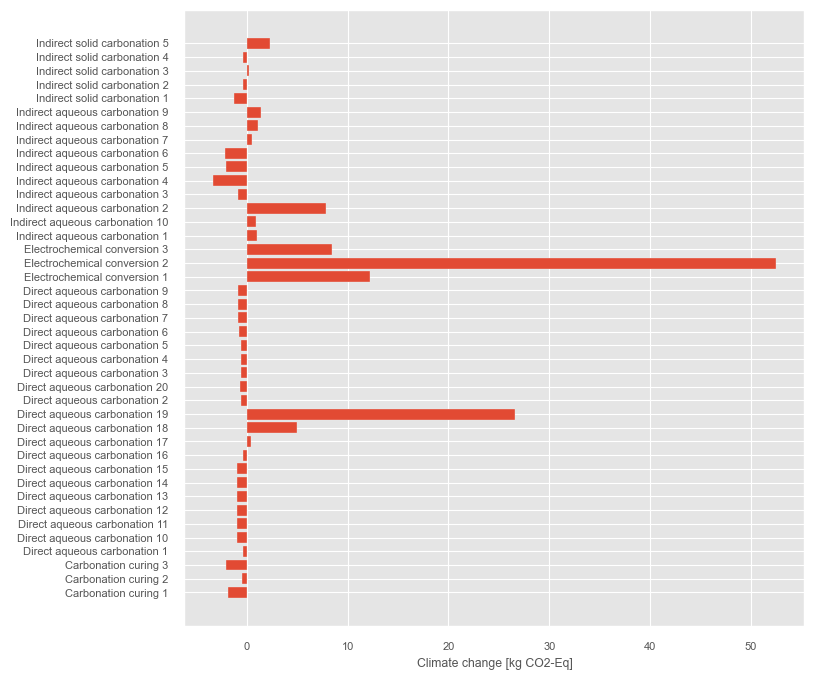

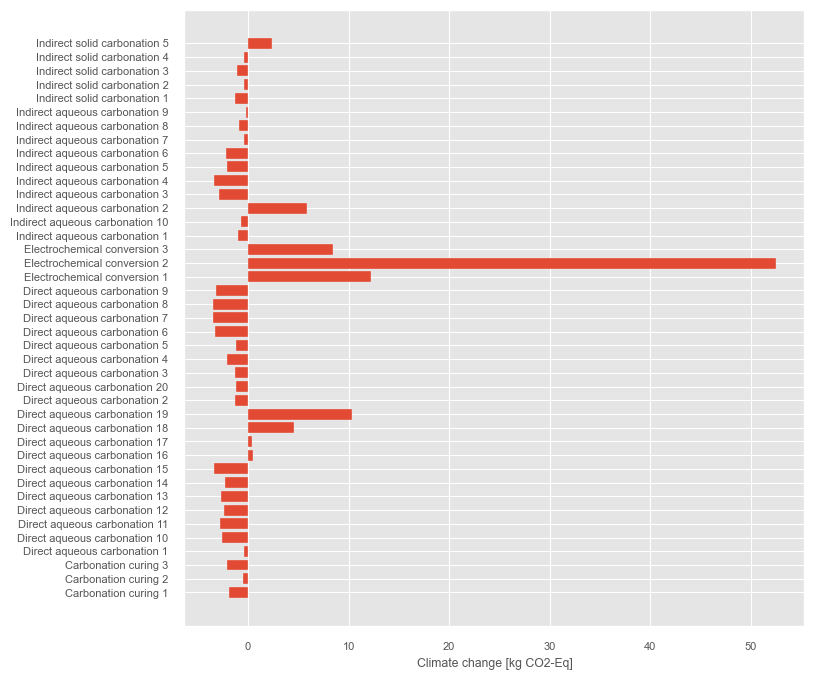

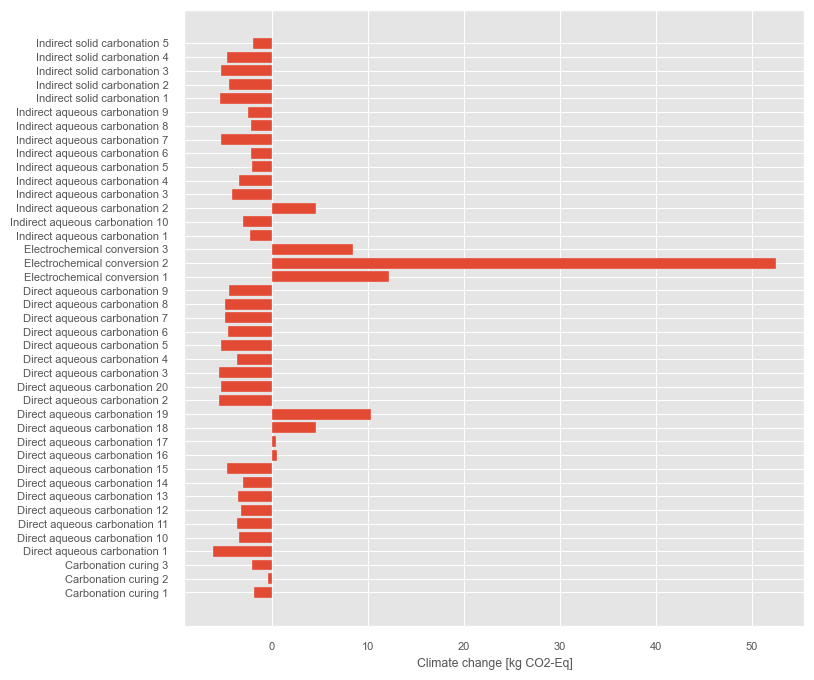

In [47]:
LCIAs = {'LCIA_Nukos_FG_pess': LCIA_Nukos_FG_pess,
         'LCIA_Nukos_FG_real': LCIA_Nukos_FG_real,
         'LCIA_Nukos_FG_opt': LCIA_Nukos_FG_opt}
i = 0

for key, value in LCIAs.items():
    for i in range(len(GWI)): 
        data = value.iloc[i].drop('Carbonation mixing 1')
        IC = value.iloc[i].name
        xlabel_IC = IC[1].capitalize() + ' [' + methods[IC]['unit'] + ']'
        IC_name = IC[1].capitalize().replace(' ', '_')


        #xlocations = np.array(range(len(data))) + 0.5
        #width = 0.5

        plt.style.use('seaborn-v0_8-paper')
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.barh(data.index, data)
        ax.set(xlabel = xlabel_IC)
        plt.rc('ytick', labelsize = 10)
        plt.rc('xtick', labelsize = 10)
        plt.savefig(key + '/Mineral_Carbonation_' + IC_name + '.png', bbox_inches='tight')
        i += 1

In [48]:
def doCAcalc(myact, mydemand, mymethod):
    my_fu = {myact: mydemand} 
    lca = LCA(my_fu, mymethod)
    lca.lci()
    lca.lcia()
    return lca.score

def getCAresults(acts, mydemand, mymethod):
    all_activities = []
    results = []
    bio_keys_list = []
    bio_list = list(lca.biosphere_dict.keys())
    i = 0
    for exc in bio_list:
        bio_keys_list.append(list(lca.biosphere_dict.keys())[i][1])
        i = i + 1
    a = 0
    while a < len(acts):
        if acts[a] in bio_keys_list: #guardian pattern needs to be improved in a further version as direct emissions are not calculated
            break
        elif acts[a] in [act['name'] for act in fg_db_opt or act in fg_db_pess or act in fg_db_real]:
            break
        elif acts[a] in [act['name'] for act in bg_db]:
            act = bg_db.get(acts[a])
        else:
            act = eidb.get(acts[a])
        all_activities.append(act['name'])
        results.append(doCAcalc(act, mydemand[a], mymethod)) # 1 stays for one unit of each process
        a += 1
     
    results_dict = list(zip(all_activities, results))
    
    return results_dict

In [49]:
tech = fg_db_opt.get('Carbonation curing 3')
act_CA = []
value_CA = []
fu = []
for i in [exc for exc in tech.exchanges() if exc['type'] == 'technosphere' or exc['type'] == 'biosphere']:  # Epxlore the activity as usual
    act_CA.append(i['input'][1])
    value_CA.append(i['amount'])
fu = list(zip(act_CA, value_CA))
print(fu)

results_CA = getCAresults(act_CA, value_CA, mymethod)
results_LCIA = sum(x[1] for x in results_CA)
print('Total: ' + str(results_LCIA))
results_CA

[('Pure CO2', 1.0), ('AOD-slag', 5.2), ('Heat', 2.456470588235294), ('Electricity', 0.31764705882352945), ('Water', 1.1529411764705884), ('Sand', 5.2), ('PC-based blocks', -11.105882352941178), ('Grey Water', 0.9294117647058824)]
Total: -2.0342897669841293


[('Pure CO2', -0.8726982477431714),
 ('AOD-slag', 0.0),
 ('Heat', 0.25408137149801174),
 ('Electricity', 0.12858204357811087),
 ('Water', 0.0003940717035510969),
 ('Sand', 0.059633968973129545),
 ('PC-based blocks', -1.6045648570388549),
 ('Grey Water', 0.0002818820450935912)]

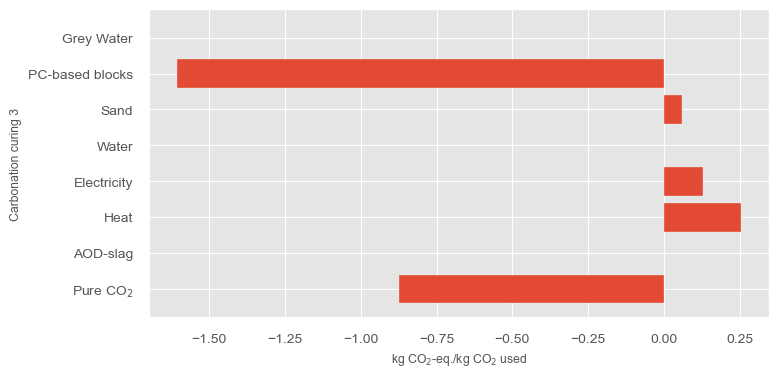

In [50]:
mymethod = GWI[0]

labels = [r'Pure CO$_2$',
          'AOD-slag',
          'Heat',
          'Electricity',
          'Water',
          'Sand',
          'PC-based blocks',
          'Grey Water']
data = [result[1] for result in results_CA]

#plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(labels, data)
ax.set(xlabel= r'kg CO$_2$-eq./kg CO$_2$ used', ylabel= tech['name'])
plt.rc('ytick', labelsize = 12)
plt.rc('xtick', labelsize = 12);
plt.savefig('CA_Carbonation_curing_3.tiff', dpi=300, bbox_inches='tight')

In [51]:
sns.color_palette('tab10')[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

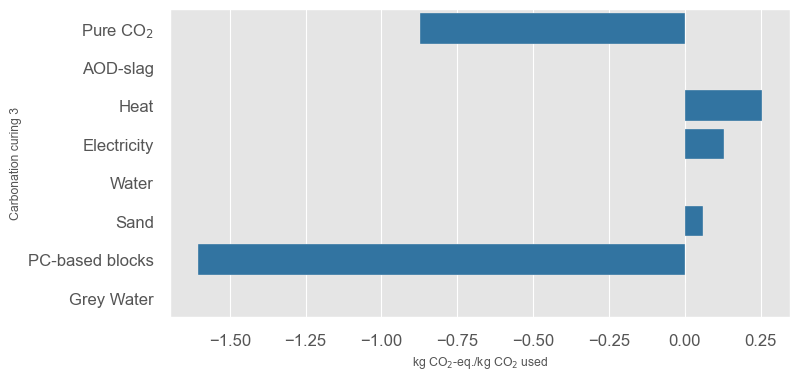

In [52]:
mymethod = GWI[0]

sns.set_palette('tab10')

labels = [
    r'Pure CO$_2$',
    'AOD-slag',
    'Heat',
    'Electricity',
    'Water',
    'Sand',
    'PC-based blocks',
    'Grey Water'
]

data = [result[1] for result in results_CA]

plt.figure(figsize=(8, 4))
sns.barplot(x=data, y=labels, color=sns.color_palette('tab10')[0])
plt.xlabel(r'kg CO$_2$-eq./kg CO$_2$ used')
plt.ylabel(tech['name'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('CA_Carbonation_curing_3.tiff', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
writer = pd.ExcelWriter("Contribution_Analysis.xlsx", engine='xlsxwriter')
for act in acts_Nukos:
    act_CA = []
    value_CA = []
    tech = fg_db_real.get(act)
    for i in [exc for exc in tech.exchanges() if exc['type'] == 'technosphere' or exc['type'] == 'biosphere']:  # Epxlore the activity as usual
        act_CA.append(i['input'][1])
        value_CA.append(i['amount'])
    results_CA = getCAresults(act_CA, value_CA, mymethod)
    my_output3 = pd.DataFrame(results_CA, columns=['Process', 'Impact']).set_index('Process')
    total = my_output3.sum()
    total.name = 'Total'
    my_output3 = my_output3.append(total.transpose())
    my_output3.to_excel(writer, sheet_name = tech['name'])
    print(tech)
writer.save()

C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Carbonation curing 1' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Carbonation curing 2' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Carbonation curing 3' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Carbonation mixing 1' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 1' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 10' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 11' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 12' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 13' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 14' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 15' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 16' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 17' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 18' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 19' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 2' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 20' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 3' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 4' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 5' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 6' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 7' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 8' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Direct aqueous carbonation 9' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Electrochemical conversion 1' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Electrochemical conversion 2' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Electrochemical conversion 3' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 1' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 10' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 2' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 3' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 4' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 5' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 6' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 7' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 8' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect aqueous carbonation 9' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect solid carbonation 1' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect solid carbonation 2' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect solid carbonation 3' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())


'Indirect solid carbonation 4' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_output3 = my_output3.append(total.transpose())
C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\4132450223.py:16: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


'Indirect solid carbonation 5' (kilogram, None, None)


C:\Users\niltho\AppData\Local\Temp\ipykernel_13252\3605998157.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 4))


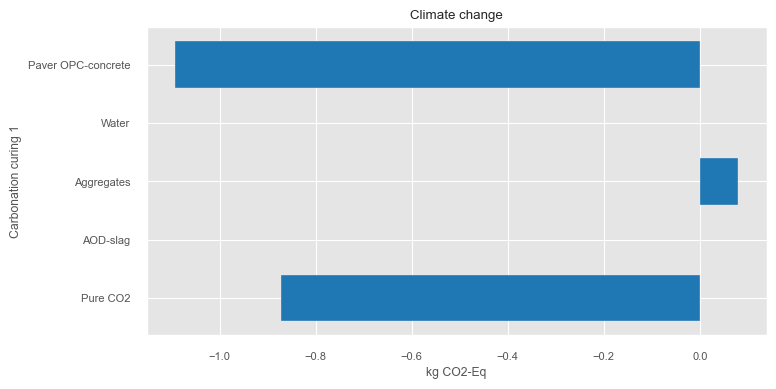

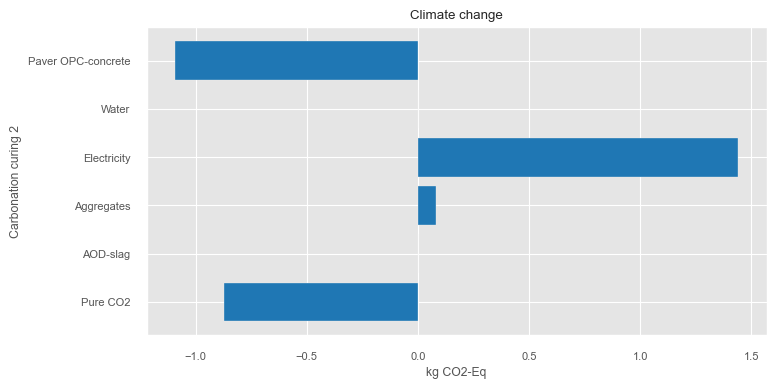

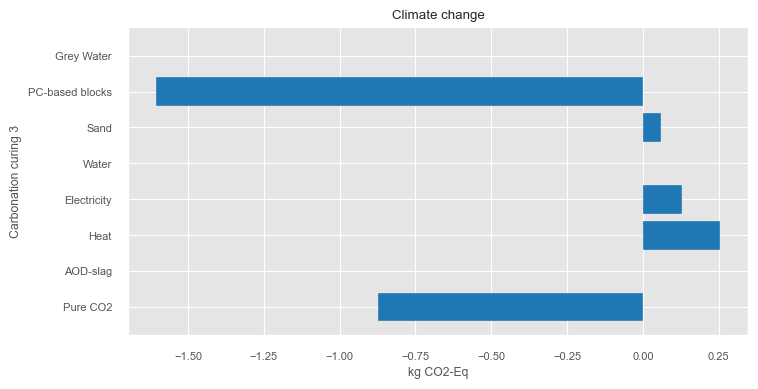

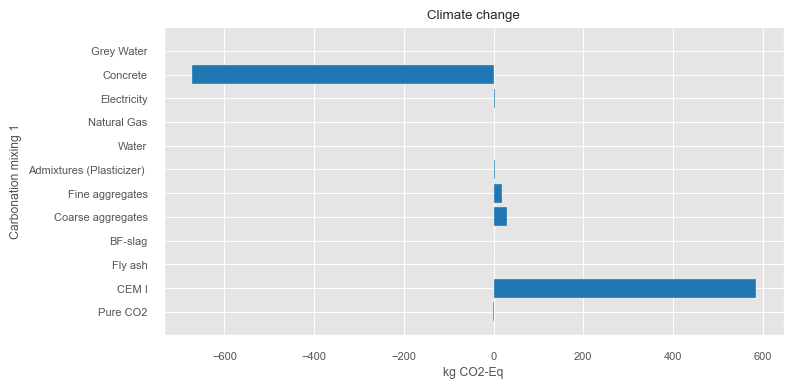

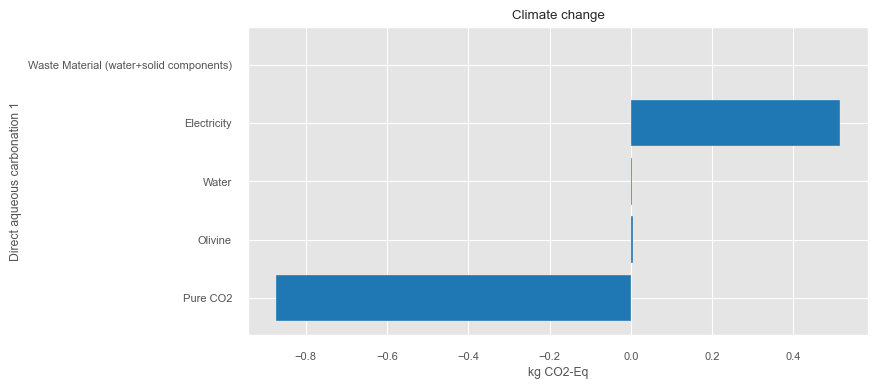

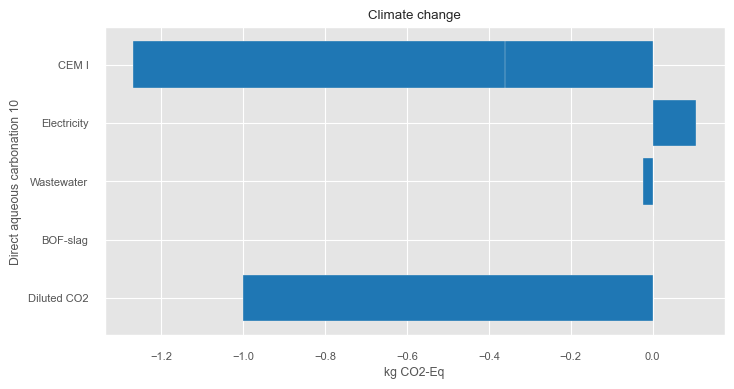

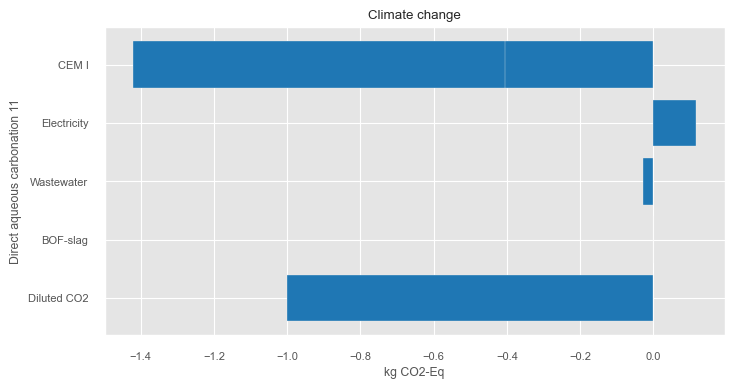

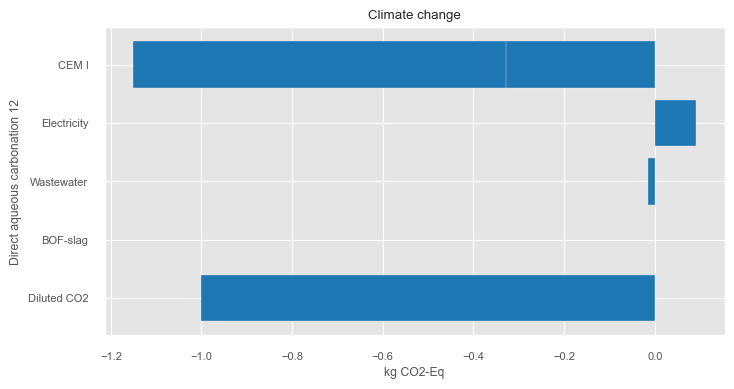

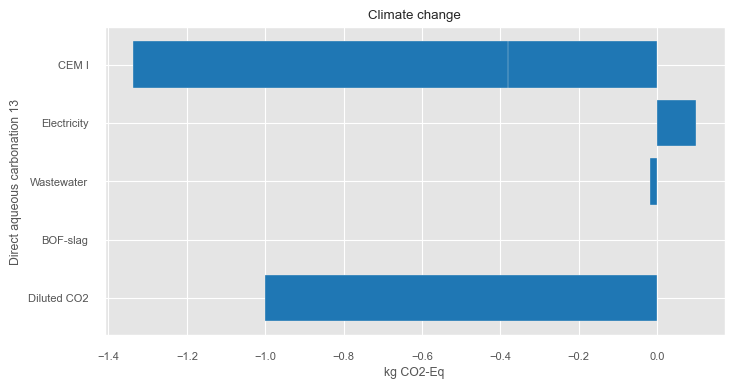

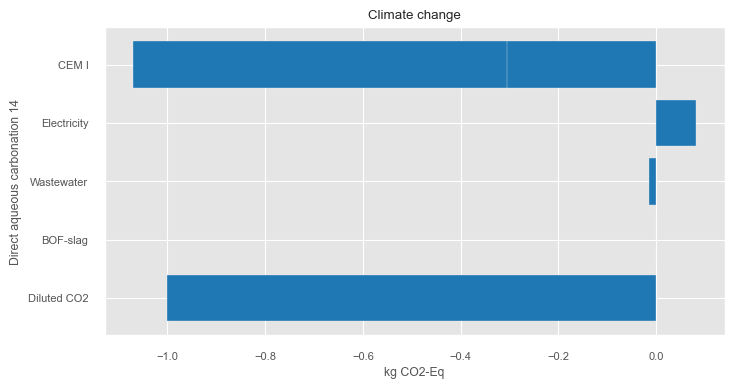

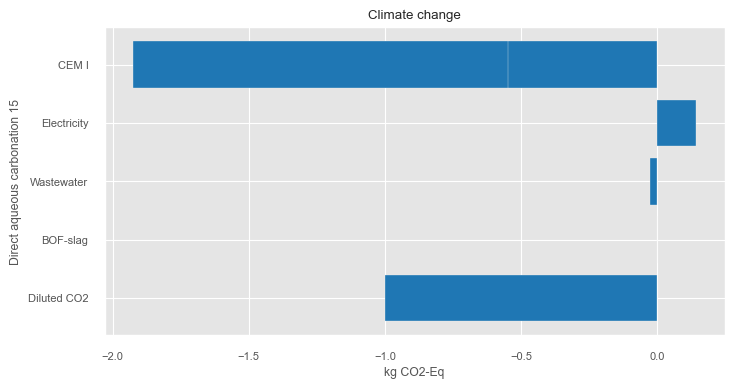

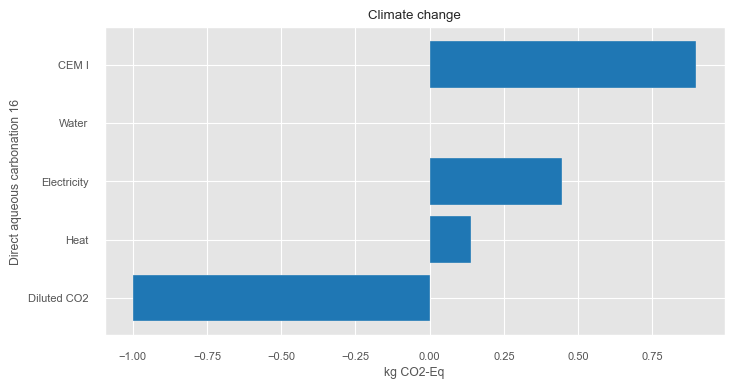

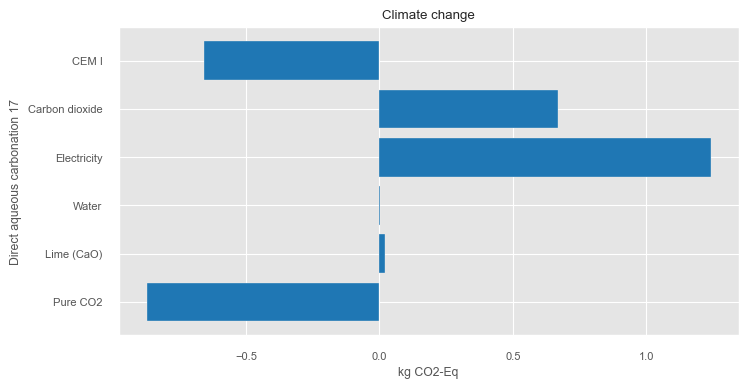

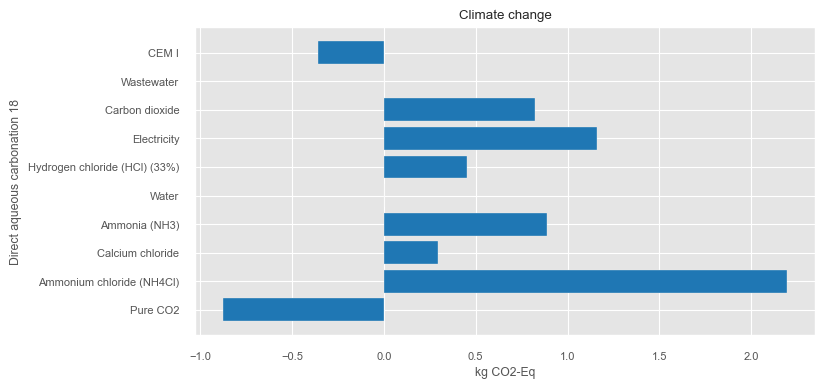

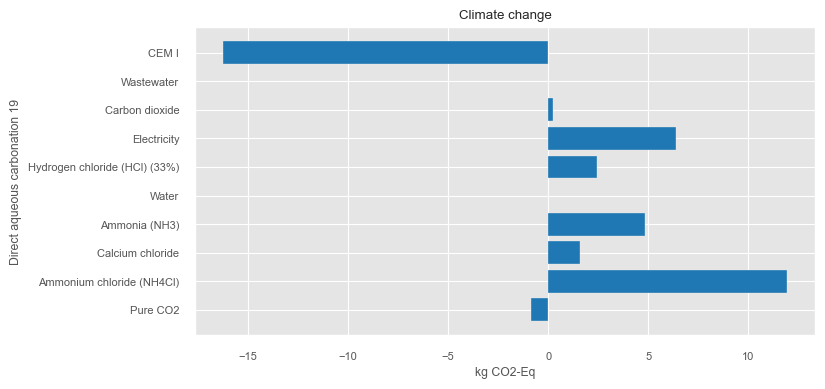

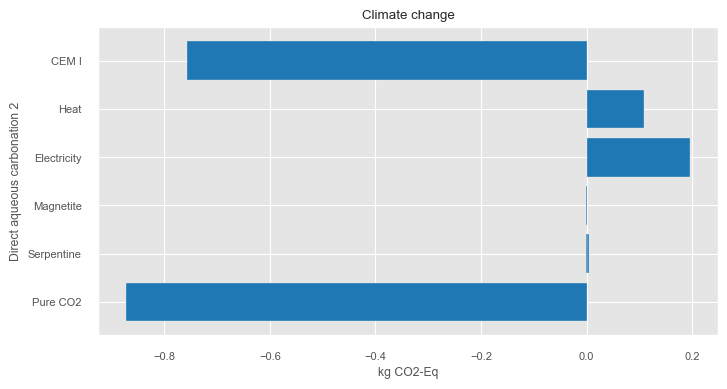

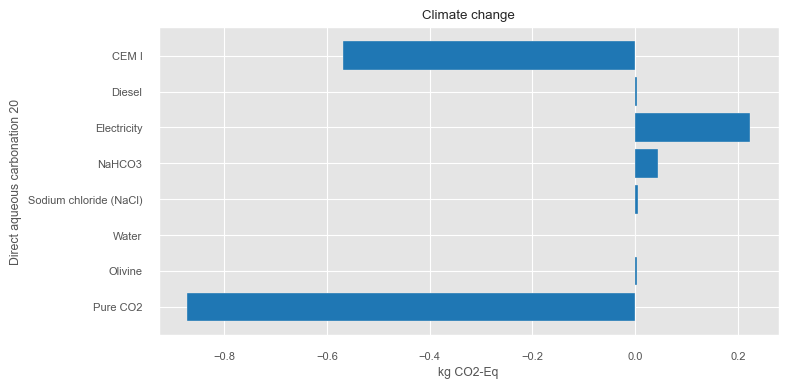

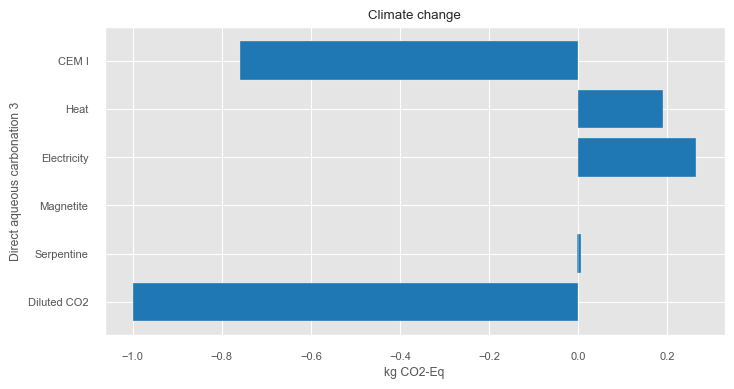

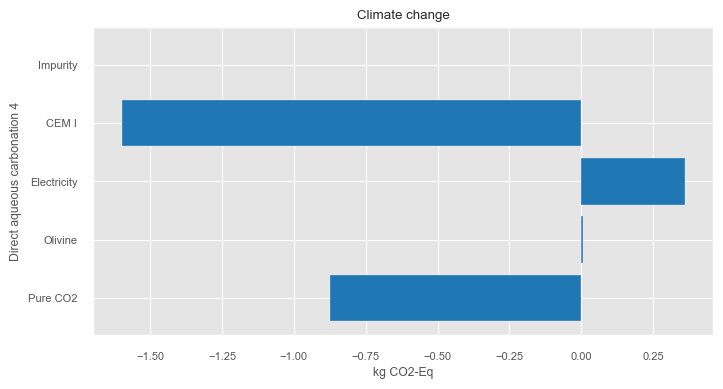

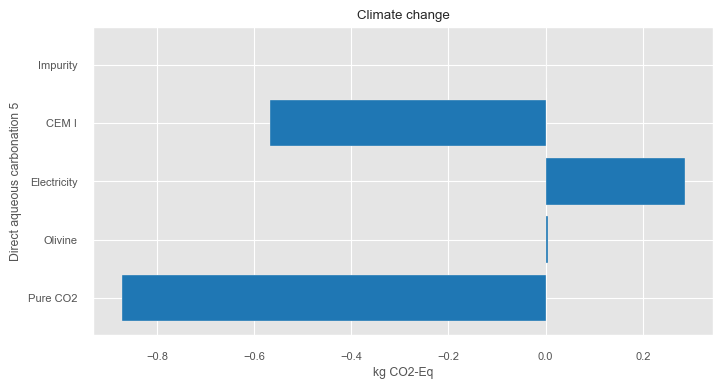

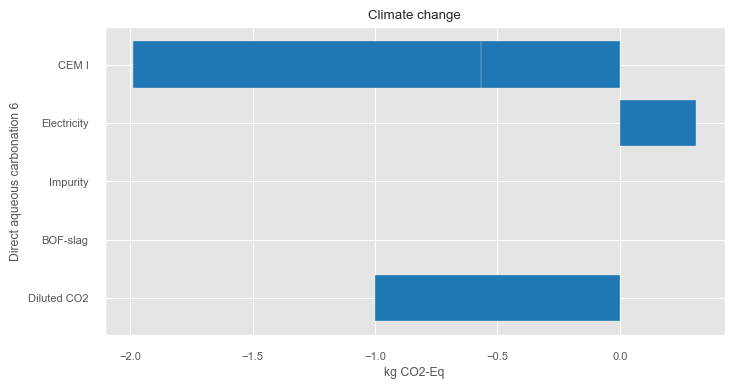

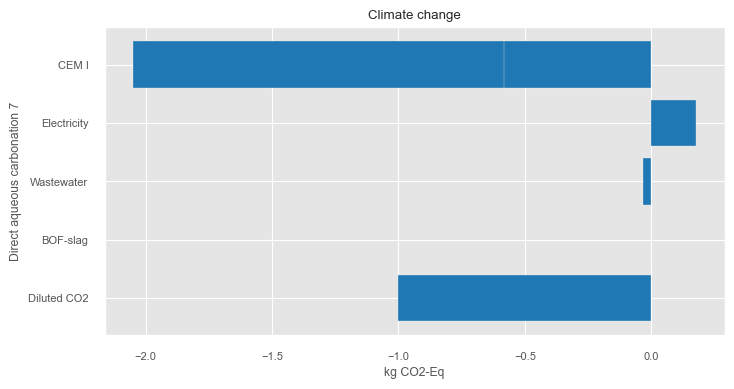

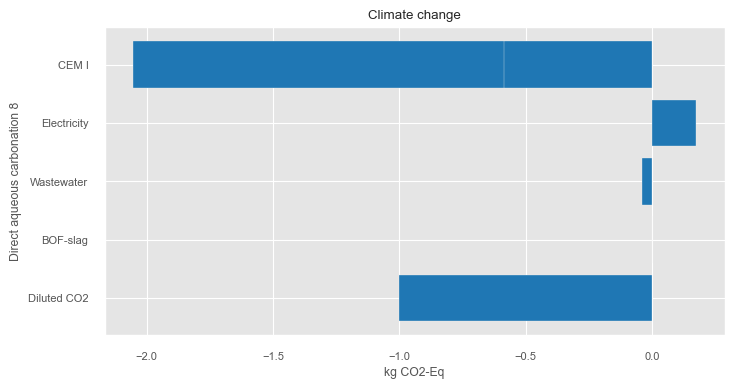

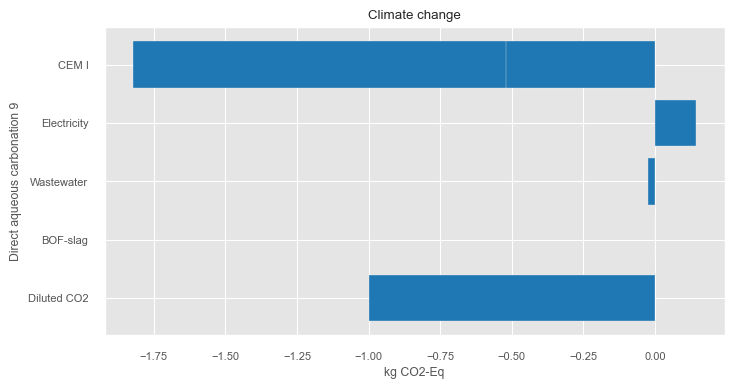

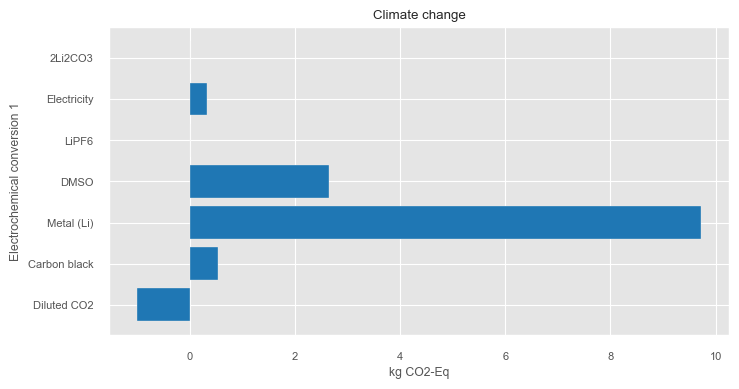

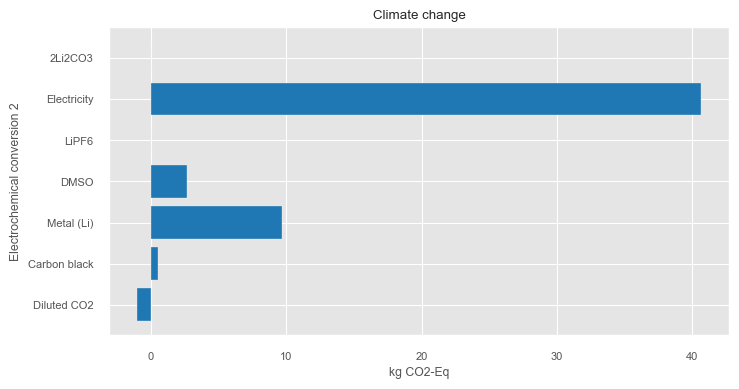

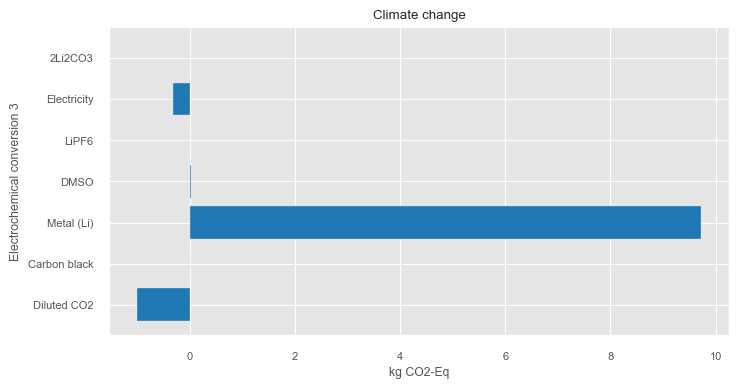

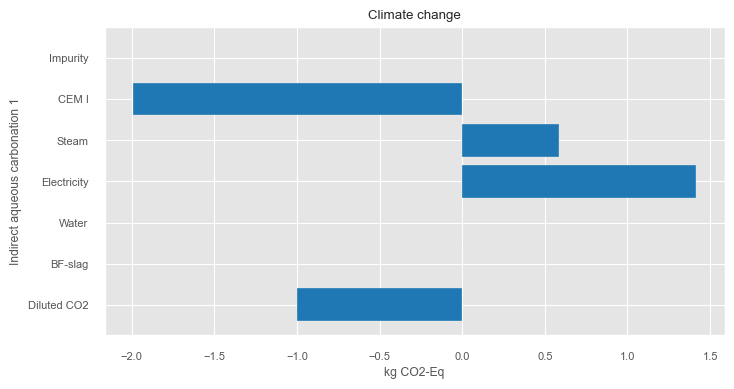

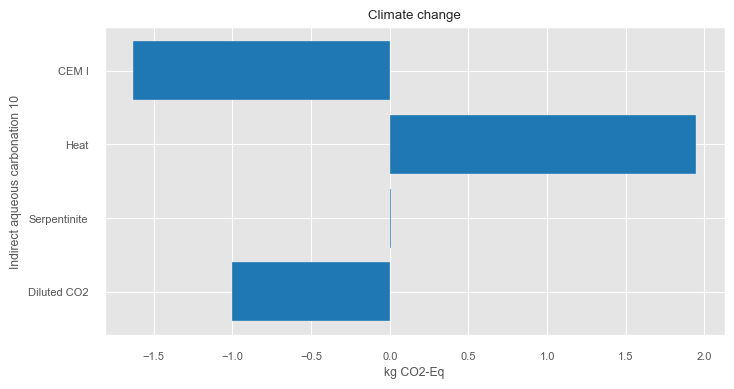

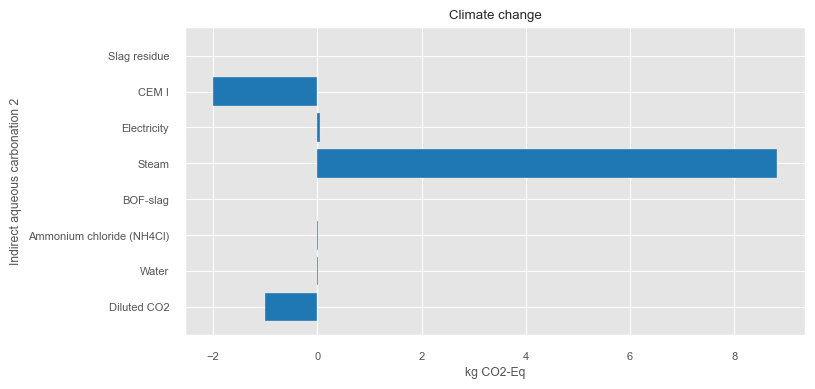

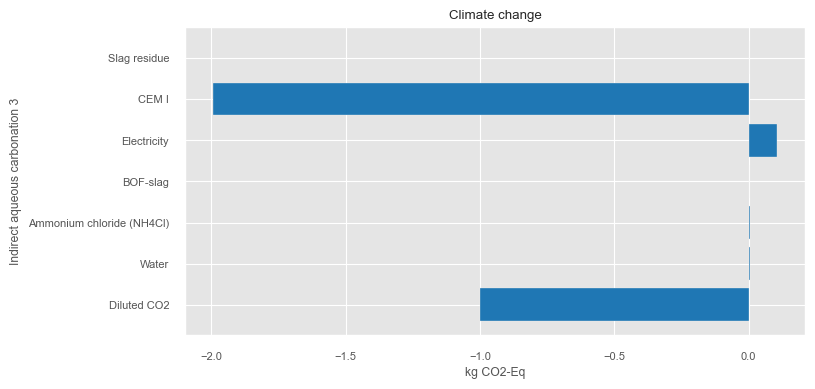

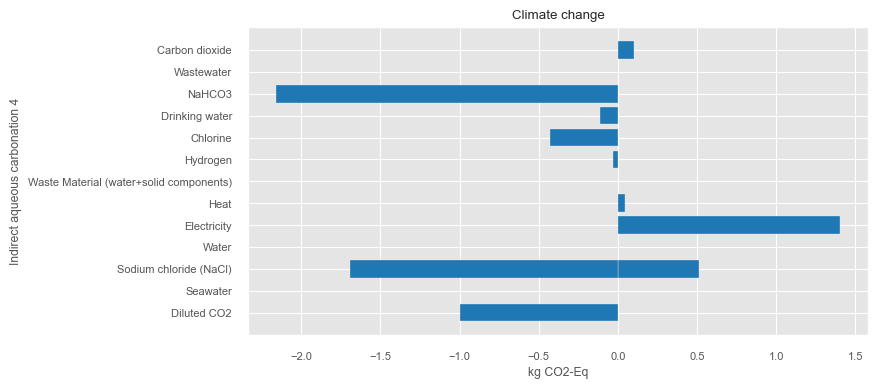

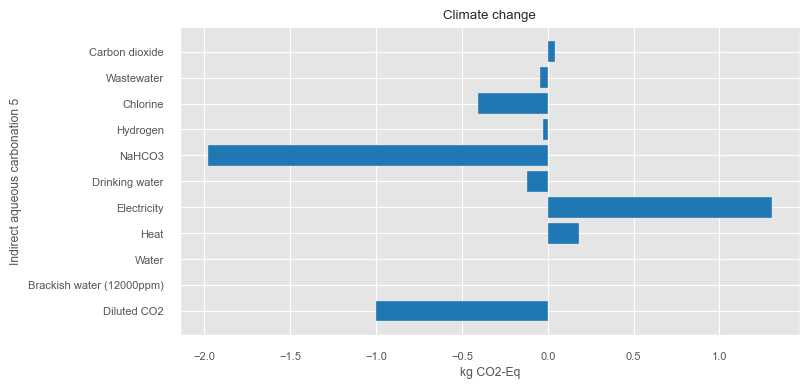

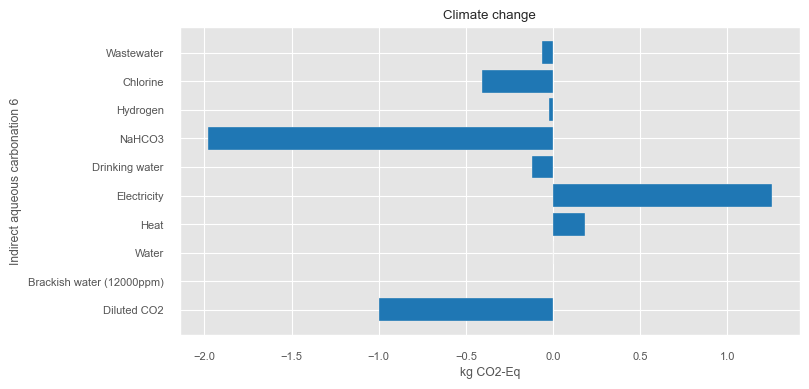

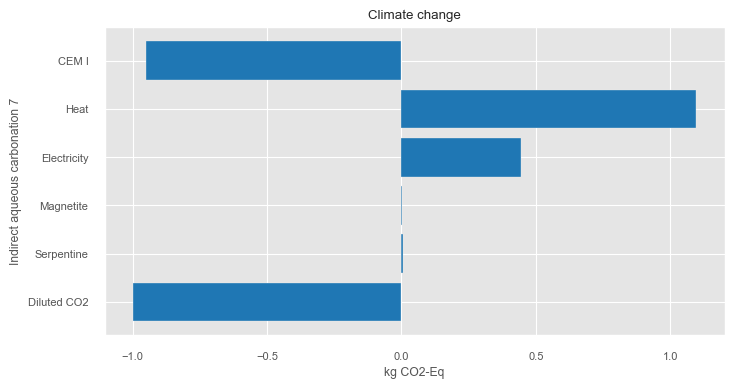

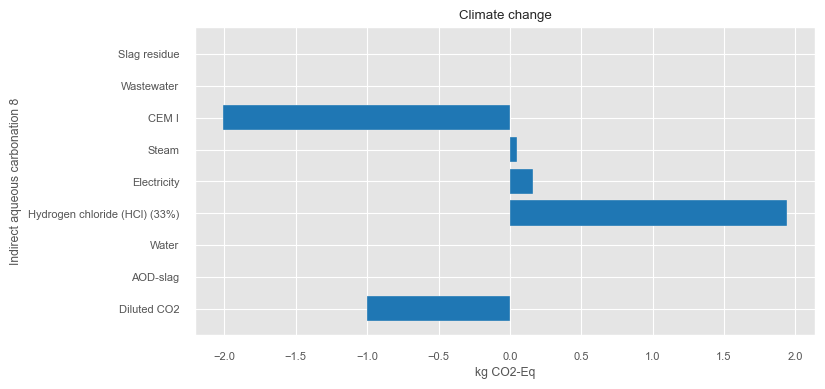

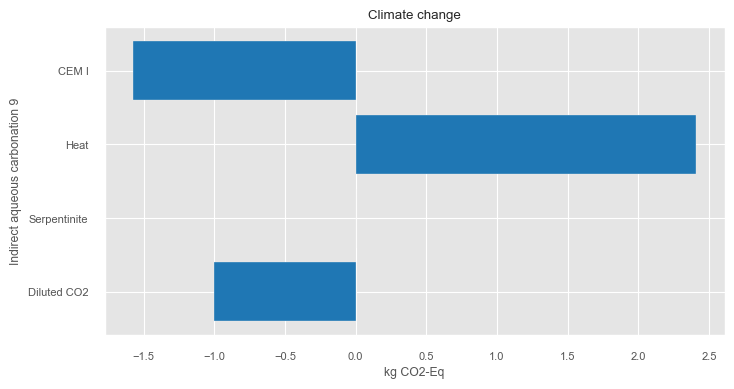

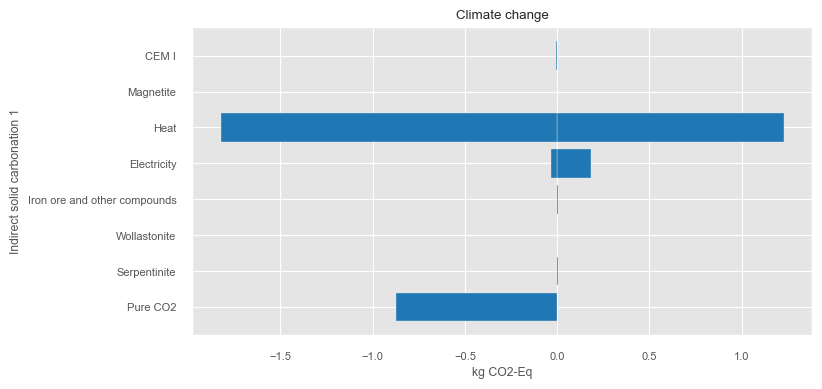

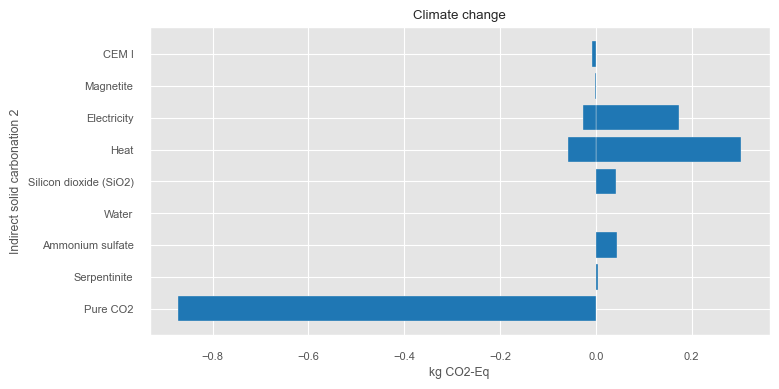

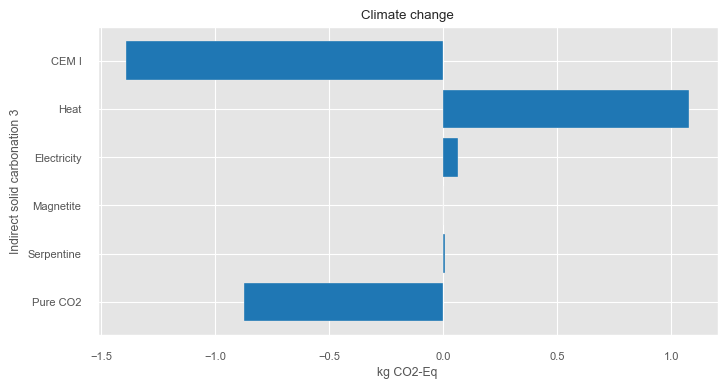

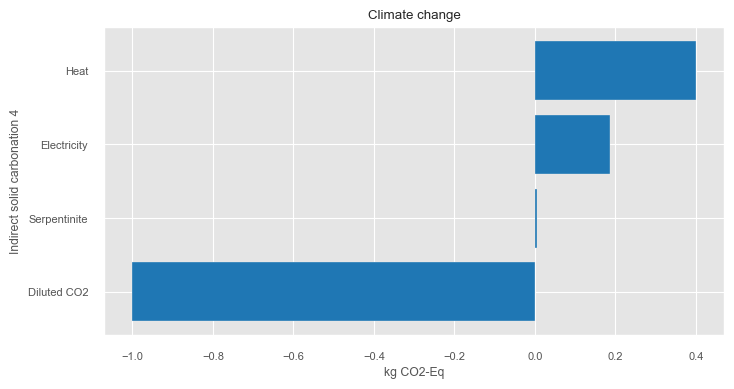

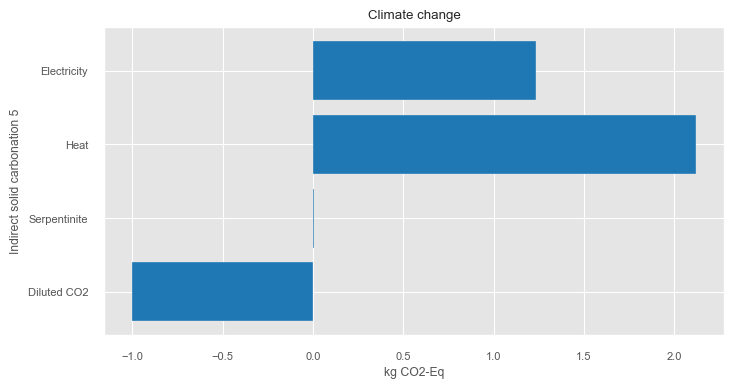

In [54]:
#name_CA_multi = 'CA_Results_' + current_tech + '_' + "".join(mymethod[1].replace(' ', '_')) + '.xlsx'
writer = pd.ExcelWriter("Contribution Analysis.xlsx", engine='xlsxwriter')
for act in acts_Nukos:
    act_CA = []
    value_CA = []
    tech = fg_db_real.get(act)
    for i in [exc for exc in tech.exchanges() if exc['type'] == 'technosphere' or exc['type'] == 'biosphere']:  # Epxlore the activity as usual
        act_CA.append(i['input'][1])
        value_CA.append(i['amount'])
    results_CA = getCAresults(act_CA, value_CA, mymethod)
    labels = [label[0] for label in results_CA]
    data = [result[1] for result in results_CA]
    plt.style.use('seaborn-v0_8-paper')
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(labels, data)
    ax.set(xlabel= methods[mymethod]["unit"], ylabel= tech['name'])
    plt.title(mymethod[1].capitalize())
    plt.rc('ytick', labelsize = 12)
    plt.rc('xtick', labelsize = 12);
    plt.savefig('CA_' + tech['name'] + '.png', bbox_inches='tight')